# Analyse Data

Code to analyse simulations made using the PPI tool.

### Prepare Workspace

In [245]:
# Import data manipulation libraries
import pandas as pd
import numpy as np

# Import statistical libraries
import statsmodels.api as sm

# Import data visualisation libraries
import matplotlib.pyplot as plt

# Load data
importance = pd.read_excel('datasets/indicator-impact.xlsx')
expenditure = pd.read_excel('datasets/government_expenditure_PPI.xlsx').set_index('program_ID')
base_levels = pd.read_excel('datasets/development_indicators_calibrated_PPI.xlsx')

# Set display options
pd.set_option('display.max_columns', None)
pd.set_option('display.float_format', lambda x: '%.6f' % x)

### Run Budget Correlations

Analysing program 1/68...
Analysing program 2/68...
Analysing program 3/68...
Analysing program 4/68...
Analysing program 5/68...
Analysing program 6/68...
Analysing program 7/68...
Analysing program 8/68...
Analysing program 9/68...
Analysing program 10/68...
Analysing program 11/68...
Analysing program 12/68...
Analysing program 13/68...
Analysing program 14/68...
Analysing program 15/68...
Analysing program 16/68...
Analysing program 17/68...
Analysing program 18/68...
Analysing program 19/68...
Analysing program 20/68...
Analysing program 21/68...
Analysing program 22/68...
Analysing program 23/68...
Analysing program 24/68...
Analysing program 25/68...
Analysing program 26/68...
Analysing program 27/68...
Analysing program 28/68...
Analysing program 29/68...
Analysing program 30/68...
Analysing program 31/68...
Analysing program 32/68...
Analysing program 33/68...
Analysing program 34/68...
Analysing program 35/68...
Analysing program 36/68...
Analysing program 37/68...
Analysing 

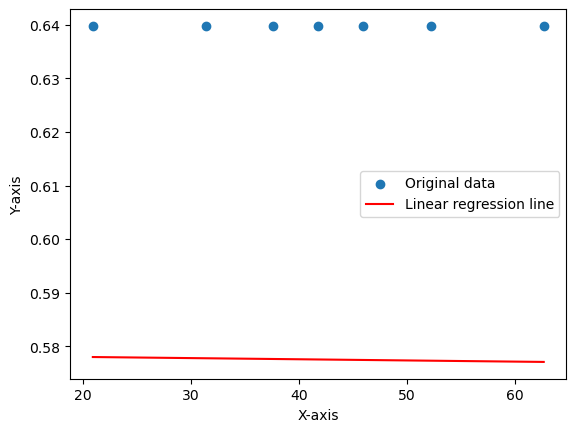

In [190]:
# Create dataframe to store coefficients
df_coeff = pd.DataFrame(index=range(1, len(expenditure)), columns=importance['indicator_label'])

# Create dataframe to store coefficients
df_coeff = pd.DataFrame(index=range(1, len(expenditure)), columns=importance['indicator_label'])

# Loop through programs
for i in range(1, len(expenditure) + 1):
    print('Analysing program {}/{}...'.format(i, len(expenditure)))
    budget = expenditure.loc[i]['expenditure']
    
    # Loop through indicators
    j = 0
    for j in range(0, len(importance)):
        indicator = importance['indicator_label'][j]
        base = base_levels.iloc[j]['final_value']
        
        # Gather data for regression
        decrease_50 = pd.read_excel('simulations/government_expenditure_50_PPI_decrease_row_{}.xlsx'.format(i), header=None).iloc[j][17]
        decrease_25 = pd.read_excel('simulations/government_expenditure_25_PPI_decrease_row_{}.xlsx'.format(i), header=None).iloc[j][17]
        decrease_10 = pd.read_excel('simulations/government_expenditure_10_PPI_decrease_row_{}.xlsx'.format(i), header=None).iloc[j][17]
        no_change = pd.read_excel('simulations/simulation_base.xlsx', header=None).iloc[j][17]
        increase_10 = pd.read_excel('simulations/government_expenditure_10_PPI_increase_row_{}.xlsx'.format(i), header=None).iloc[j][17]
        increase_25 = pd.read_excel('simulations/government_expenditure_25_PPI_increase_row_{}.xlsx'.format(i), header=None).iloc[j][17]
        increase_50 = pd.read_excel('simulations/government_expenditure_50_PPI_increase_row_{}.xlsx'.format(i), header=None).iloc[j][17]
        
        # Format data for regression
        x = np.array([budget * 0.5, budget * 0.75, budget * 0.9, budget, budget * 1.1, budget * 1.25, budget * 1.5])
        y = np.array([decrease_50, decrease_25, decrease_10, no_change, increase_10, increase_25, increase_50])
        #y_perc = (y - base) / base * 100
        y_log = np.log(y)
        
        # Add a constant term to the independent variable (x) for the intercept
        X = sm.add_constant(x)
        
        # Create a linear regression model
        model = sm.OLS(y_log, X)
        
        # Fit the model to the data
        results = model.fit()
        
        # Extract coefficients
        coeff = results.params[1]
        df_coeff.at[i, indicator] = coeff

### Convert Correlations to Elasticities

In [224]:
# Define the transformation function
def percent_change(x):
    return (np.exp(x) - 1) * 100

# Calculate the percent change in the indicator for a one percent budget increase
df_coeff_percent = df_coeff.map(percent_change)

# Calculate the percent change in the indicator for a one unit budget increase
df_coeff_unit = df_coeff_final.divide(expenditure['expenditure'], axis='index')

# Scale indicators by importance
df_coeff_unit_scaled = 

# Need to double check division method for budget, looks like it is just doing it based on a single value
# Also need to fix this for the importance scaling

In [246]:
df_coeff_unit

indicator_label,lab_prog,soc_prog,int_povline,nat_povline,basic_watser,agr_index,breed_risk,child_stunt,under_nour,dtp_3,under5_mort,hiv_new,mat_mort,adol_birth,edutrain_all,org_learn,compl_uppsec,fem_manag,fem_parl,unpaid_care,perm_water,reser_max,wat_stress,safe_watser,open_def,safe_sanser,acs_elec,energ_int,renenerg_gen,renenerg_sh,mat_consum,atm_tot,gdppc_gr,fatal_occup,gdpempl_gr,inf_empl,neet_youth,unempl_all,co2_gdp,r&d_exp,ind_va,smallind_va,techind_va,ind_empl,cap_rwass,pov_50med,lab_sh,refug_rate,finpart_matt,urb_slums,affect_dis,ecoloss_dis,damdwell_dis,haz_was,munwas_rec,tot_was,foss_subs,drr_score,drr_locgov,chl_dev,markba_prot,forest_cert,smta_tot,watkba_prot,mounkba_prot,terrkba_prot,red_list,gov_exp,hum_traff,homic_intent,unsent_det,remitt_gdp,ext_debt,debt_export,budg_tax,pppart_infr,gov_reven,bband_subs,web_use,finalcons_gr,export_gr
1,-0.001093,-0.000501,0.026926,0.028870,0.000094,0.000632,-0.000115,0.000744,0.000907,-0.000364,0.002050,-0.000679,-0.001850,-0.000472,-0.002549,0.000409,0.001739,-0.001347,0.003871,-0.000385,-0.000080,0.000042,0.063121,-0.001298,-0.000152,0.000145,0.001997,0.000123,-0.000213,-0.045620,0.020189,-0.009812,-0.000050,-0.000612,0.003030,-0.001453,-0.002948,0.000061,-0.000108,-0.001640,-0.002138,0.000170,-0.000016,0.044743,-0.000961,-0.000675,0.000147,0.001697,0.000898,0.001332,0.000076,0.011374,-0.000548,-0.024153,0.001783,-0.010807,0.000185,-0.001018,0.000136,-0.000745,-0.000487,-0.001241,0.000828,0.000238,0.000154,-0.000214,0.035912,0.001494,0.001464,0.000094,0.000194,0.000439,0.010362,0.001067,0.000261,-0.000707,0.000180,-0.000787,-0.002705,0.000048,0.000001
2,0.000020,-0.000009,-0.000010,0.094445,0.000017,0.000029,0.000005,0.000123,-0.000012,-0.000054,-0.000058,0.000036,-0.000065,-0.000002,0.000065,0.000190,0.000133,0.000093,0.000051,0.000069,0.000001,-0.000001,0.000533,0.000067,0.000011,0.000111,0.000010,0.000021,-0.000195,0.004759,-0.003028,-0.001231,0.000008,-0.000013,0.000076,0.000046,0.001040,0.000002,0.000039,0.000062,0.000066,-0.000050,-0.000017,-0.001858,0.000049,-0.000106,0.000029,0.000049,-0.000030,0.000090,0.000006,-0.000925,-0.000017,0.005687,-0.000070,-0.000530,0.000071,-0.000122,0.000140,-0.000028,0.000007,0.000004,-0.000001,0.000024,-0.000008,-0.000085,-0.002352,0.000034,0.000136,-0.000003,-0.000021,0.000072,-0.000474,0.000227,-0.000084,-0.000046,-0.000031,-0.000008,0.000148,0.000002,0.000007
3,0.001168,0.000741,-0.000002,0.000359,-0.000009,-0.000013,0.000002,0.000003,-0.000005,-0.000012,0.000007,0.000045,0.000003,-0.000001,0.000006,0.000017,-0.000004,0.000008,-0.000020,-0.000001,0.000001,-0.000001,-0.001409,0.000009,0.000024,-0.000018,0.000020,0.000007,0.000051,0.000111,-0.000401,-0.000286,0.000002,0.000012,0.000009,0.000039,-0.000086,-0.000001,-0.000008,0.000051,-0.000028,-0.000003,-0.000001,0.000789,0.000017,0.000002,-0.000010,0.000035,0.000013,0.000005,-0.000002,0.000062,0.000018,-0.000222,-0.000043,-0.001887,-0.000017,-0.000019,0.000052,0.000026,-0.000007,0.000010,0.000001,-0.000001,-0.000006,-0.000020,0.001896,0.000036,-0.000016,-0.000003,0.000018,-0.000005,0.000473,0.000181,-0.000016,-0.000006,0.000003,0.000018,-0.000014,-0.000001,0.000000
4,0.000050,-0.000076,-0.000007,-0.001276,0.002084,-0.000080,0.000001,0.000002,-0.000079,0.000024,-0.000077,-0.000001,0.000092,0.000024,-0.000060,-0.000026,0.000094,-0.000033,0.000101,-0.000051,0.000000,0.000000,0.001507,0.000004,-0.000035,0.000002,-0.000022,-0.000029,0.000060,0.001172,0.000710,-0.000026,-0.000001,-0.000031,-0.000064,0.000060,-0.000365,-0.000003,-0.000018,-0.000027,-0.000054,-0.000004,0.000004,0.002705,0.000009,-0.000080,-0.000010,0.000020,0.000043,-0.000050,0.000006,-0.000023,0.000025,-0.000078,0.000005,-0.003278,-0.000006,0.000165,-0.000330,-0.000013,-0.000010,-0.000033,-0.000001,0.000009,0.000013,-0.000044,0.000185,-0.000031,0.000057,0.000005,0.000060,0.000019,0.000455,-0.000128,0.000042,0.000054,-0.000008,-0.000057,-0.000072,-0.000004,-0.000001
5,-0.000084,0.000093,-0.000082,-0.004282,-0.000170,0.000297

In [244]:
importance['importance_rank']

0     3
1     3
2     4
3     4
4     4
     ..
76    2
77    1
78    2
79    2
80    2
Name: importance_rank, Length: 81, dtype: int64

In [252]:
0.028870 * 3

0.08660999999999999

In [254]:
df_coeff_unit_scaled  / df_coeff_unit

indicator_label,lab_prog,soc_prog,int_povline,nat_povline,basic_watser,agr_index,breed_risk,child_stunt,under_nour,dtp_3,under5_mort,hiv_new,mat_mort,adol_birth,edutrain_all,org_learn,compl_uppsec,fem_manag,fem_parl,unpaid_care,perm_water,reser_max,wat_stress,safe_watser,open_def,safe_sanser,acs_elec,energ_int,renenerg_gen,renenerg_sh,mat_consum,atm_tot,gdppc_gr,fatal_occup,gdpempl_gr,inf_empl,neet_youth,unempl_all,co2_gdp,r&d_exp,ind_va,smallind_va,techind_va,ind_empl,cap_rwass,pov_50med,lab_sh,refug_rate,finpart_matt,urb_slums,affect_dis,ecoloss_dis,damdwell_dis,haz_was,munwas_rec,tot_was,foss_subs,drr_score,drr_locgov,chl_dev,markba_prot,forest_cert,smta_tot,watkba_prot,mounkba_prot,terrkba_prot,red_list,gov_exp,hum_traff,homic_intent,unsent_det,remitt_gdp,ext_debt,debt_export,budg_tax,pppart_infr,gov_reven,bband_subs,web_use,finalcons_gr,export_gr
1,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000
2,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000
3,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000
4,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000
5,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.0

In [253]:
df_coeff_unit_scaled = df_coeff_unit.mul(importance['importance_rank'].T.iloc[0], axis=1)
df_coeff_unit_scaled

indicator_label,lab_prog,soc_prog,int_povline,nat_povline,basic_watser,agr_index,breed_risk,child_stunt,under_nour,dtp_3,under5_mort,hiv_new,mat_mort,adol_birth,edutrain_all,org_learn,compl_uppsec,fem_manag,fem_parl,unpaid_care,perm_water,reser_max,wat_stress,safe_watser,open_def,safe_sanser,acs_elec,energ_int,renenerg_gen,renenerg_sh,mat_consum,atm_tot,gdppc_gr,fatal_occup,gdpempl_gr,inf_empl,neet_youth,unempl_all,co2_gdp,r&d_exp,ind_va,smallind_va,techind_va,ind_empl,cap_rwass,pov_50med,lab_sh,refug_rate,finpart_matt,urb_slums,affect_dis,ecoloss_dis,damdwell_dis,haz_was,munwas_rec,tot_was,foss_subs,drr_score,drr_locgov,chl_dev,markba_prot,forest_cert,smta_tot,watkba_prot,mounkba_prot,terrkba_prot,red_list,gov_exp,hum_traff,homic_intent,unsent_det,remitt_gdp,ext_debt,debt_export,budg_tax,pppart_infr,gov_reven,bband_subs,web_use,finalcons_gr,export_gr
1,-0.003279,-0.001503,0.080778,0.086610,0.000283,0.001897,-0.000346,0.002231,0.002721,-0.001093,0.006150,-0.002037,-0.005549,-0.001417,-0.007648,0.001228,0.005217,-0.004041,0.011612,-0.001156,-0.000241,0.000125,0.189362,-0.003894,-0.000455,0.000434,0.005992,0.000368,-0.000638,-0.136861,0.060568,-0.029436,-0.000151,-0.001837,0.009090,-0.004358,-0.008843,0.000182,-0.000324,-0.004920,-0.006415,0.000509,-0.000049,0.134230,-0.002883,-0.002026,0.000441,0.005090,0.002694,0.003997,0.000228,0.034121,-0.001645,-0.072460,0.005348,-0.032421,0.000554,-0.003053,0.000409,-0.002235,-0.001460,-0.003724,0.002483,0.000713,0.000463,-0.000643,0.107736,0.004481,0.004392,0.000282,0.000583,0.001318,0.031085,0.003202,0.000783,-0.002122,0.000540,-0.002361,-0.008116,0.000143,0.000002
2,0.000060,-0.000027,-0.000029,0.283336,0.000050,0.000087,0.000014,0.000369,-0.000036,-0.000162,-0.000174,0.000107,-0.000195,-0.000006,0.000196,0.000569,0.000400,0.000278,0.000152,0.000207,0.000004,-0.000004,0.001598,0.000202,0.000033,0.000334,0.000031,0.000063,-0.000584,0.014277,-0.009085,-0.003693,0.000023,-0.000038,0.000229,0.000137,0.003119,0.000006,0.000117,0.000186,0.000197,-0.000149,-0.000052,-0.005573,0.000148,-0.000319,0.000087,0.000148,-0.000091,0.000269,0.000018,-0.002776,-0.000050,0.017060,-0.000210,-0.001590,0.000213,-0.000367,0.000419,-0.000083,0.000020,0.000013,-0.000002,0.000071,-0.000023,-0.000256,-0.007055,0.000101,0.000409,-0.000008,-0.000062,0.000215,-0.001421,0.000680,-0.000251,-0.000137,-0.000094,-0.000023,0.000445,0.000007,0.000021
3,0.003504,0.002222,-0.000005,0.001076,-0.000028,-0.000040,0.000005,0.000010,-0.000016,-0.000035,0.000022,0.000136,0.000008,-0.000002,0.000018,0.000050,-0.000011,0.000023,-0.000061,-0.000003,0.000002,-0.000002,-0.004226,0.000028,0.000073,-0.000053,0.000060,0.000022,0.000153,0.000332,-0.001202,-0.000859,0.000007,0.000035,0.000027,0.000116,-0.000257,-0.000002,-0.000023,0.000153,-0.000085,-0.000010,-0.000003,0.002366,0.000051,0.000006,-0.000030,0.000104,0.000040,0.000015,-0.000007,0.000187,0.000054,-0.000666,-0.000128,-0.005661,-0.000050,-0.000056,0.000155,0.000077,-0.000020,0.000030,0.000003,-0.000002,-0.000017,-0.000059,0.005687,0.000107,-0.000049,-0.000010,0.000053,-0.000016,0.001419,0.000544,-0.000049,-0.000018,0.000009,0.000054,-0.000043,-0.000003,0.000000
4,0.000150,-0.000228,-0.000020,-0.003828,0.006251,-0.000239,0.000004,0.000007,-0.000238,0.000073,-0.000232,-0.000002,0.000276,0.000071,-0.000181,-0.000077,0.000283,-0.000098,0.000304,-0.000153,0.000000,0.000001,0.004522,0.000012,-0.000105,0.000006,-0.000065,-0.000086,0.000179,0.003517,0.002129,-0.000078,-0.000002,-0.000094,-0.000191,0.000180,-0.001094,-0.000009,-0.000055,-0.000080,-0.000162,-0.000012,0.000012,0.008116,0.000027,-0.000240,-0.000031,0.000060,0.000128,-0.000150,0.000018,-0.000070,0.000075,-0.000233,0.000016,-0.009835,-0.000019,0.000495,-0.000989,-0.000038,-0.000031,-0.000100,-0.000002,0.000028,0.000040,-0.000131,0.000555,-0.000093,0.000171,0.000014,0.000181,0.000058,0.001366,-0.000383,0.000127,0.000161,-0.000023,-0.000171,-0.000215,-0.000011,-0.000004
5,-0.000252,0.000278,-0.000247,-0.012845,-0.000511,0.000890

### Identify Highest Impact Programs

In [231]:
df_coeff_unit.sum(axis=1).sort_values(ascending=False)

28     9.472907
33     6.259851
25     1.756628
48     1.107241
8      0.671405
        ...    
50    -0.074791
20    -0.155826
65    -1.269656
18    -5.080321
27   -16.334028
Length: 68, dtype: float64

In [ ]:
df_coeff_unit

### Identify Accelerators

### Identify Bottlenecks

In [ ]:
# Interpretation: Estimated percentage change in the original indicator for a one-unit increase in the percent budget increase